Sprint 1. Exploratory analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from sqlalchemy import create_engine

In [3]:
# подгружаем .env
load_dotenv()

True

In [4]:
# Считываем все креды
src_host = os.environ.get('DB_SOURCE_HOST')
src_port = os.environ.get('DB_SOURCE_PORT')
src_username = os.environ.get('DB_SOURCE_USER')
src_password = os.environ.get('DB_SOURCE_PASSWORD')
src_db = os.environ.get('DB_SOURCE_NAME') 

dst_host = os.environ.get('DB_DESTINATION_HOST')
dst_port = os.environ.get('DB_DESTINATION_PORT')
dst_username = os.environ.get('DB_DESTINATION_USER')
dst_password = os.environ.get('DB_DESTINATION_PASSWORD')
dst_db = os.environ.get('DB_DESTINATION_NAME')

s3_bucket = os.environ.get('S3_BUCKET_NAME')
s3_access_key = os.environ.get('AWS_ACCESS_KEY_ID')
s3_secret_access_key = os.environ.get('AWS_SECRET_ACCESS_KEY')

In [5]:
# Создадим соединения
src_conn = create_engine(f'postgresql://{src_username}:{src_password}@{src_host}:{src_port}/{src_db}')
dst_conn = create_engine(f'postgresql://{dst_username}:{dst_password}@{dst_host}:{dst_port}/{dst_db}')

In [6]:
def extract(conn):
    #hook = PostgresHook('destination_db')
    #conn = hook.get_conn()
    sql = """
        select *
        from flat_initial_data
    """
    data = pd.read_sql(sql, conn)
    #conn.close()
    return data

data = extract(dst_conn)
print(data.dtypes)

flat_id               object
build_year             int64
building_type_int      int64
latitude             float64
longitude            float64
ceiling_height       float64
flats_count            int64
floors_total           int64
has_elevator           int64
floor                  int64
kitchen_area         float64
living_area          float64
rooms                  int64
is_apartment           int64
studio                 int64
total_area           float64
price                  int64
dtype: object


In [7]:
data.shape

(141362, 17)

In [8]:
def remove_duplicates(data):
    cols = ['floor', 'kitchen_area', 'living_area', 'rooms', 'is_apartment', 'studio', 'total_area', 'price']
    is_duplicated_features = data.duplicated(subset=cols, keep=False)
    data = data[~is_duplicated_features].reset_index(drop=True)
    return data

transformed_data = remove_duplicates(data)
transformed_data.shape

(122074, 17)

In [9]:
transformed_data.isnull().sum()

flat_id              0
build_year           0
building_type_int    0
latitude             0
longitude            0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
floor                0
kitchen_area         0
living_area          0
rooms                0
is_apartment         0
studio               0
total_area           0
price                0
dtype: int64

<Axes: xlabel='build_year', ylabel='Count'>

count    122074.000000
mean       1986.472427
std          22.055286
min        1901.000000
25%        1969.000000
50%        1985.000000
75%        2006.000000
max        2023.000000
Name: build_year, dtype: float64

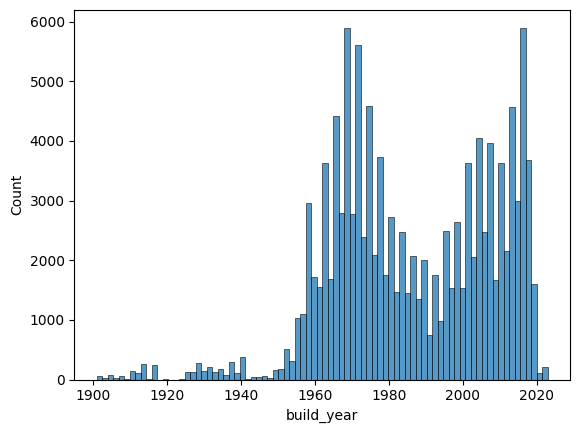

In [10]:
import seaborn as sns

display(sns.histplot(transformed_data['build_year'])) 
display(transformed_data['build_year'].describe())

In [11]:
#sns.countplot(transformed_data['building_type_int']) 
transformed_data['building_type_int'].nunique()

7

<Axes: xlabel='building_type_int', ylabel='Count'>

building_type_int
4    68222
2    21410
1    20100
6     9200
0     1616
3     1522
5        4
Name: count, dtype: int64

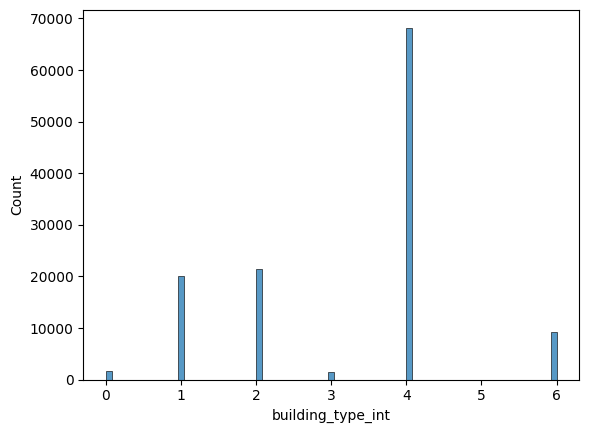

In [12]:
display(sns.histplot(transformed_data['building_type_int']))
#transformed_data['building_type_int'].head()
#len(transformed_data[transformed_data['building_type_int'] == 5])
transformed_data['building_type_int'].value_counts()

In [13]:
#display(sns.displot(transformed_data['ceiling_height'])) 
transformed_data['ceiling_height'].describe()

count    122074.000000
mean          2.751552
std           0.223420
min           2.000000
25%           2.640000
50%           2.640000
75%           2.800000
max          27.000000
Name: ceiling_height, dtype: float64

In [14]:
display(transformed_data['flats_count'].describe())

count    122074.000000
mean        251.348313
std         207.085765
min           1.000000
25%         111.000000
50%         199.000000
75%         322.000000
max        4455.000000
Name: flats_count, dtype: float64

<Axes: xlabel='floors_total', ylabel='Count'>

count    122074.000000
mean         14.074135
std           6.883116
min           1.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          99.000000
Name: floors_total, dtype: float64

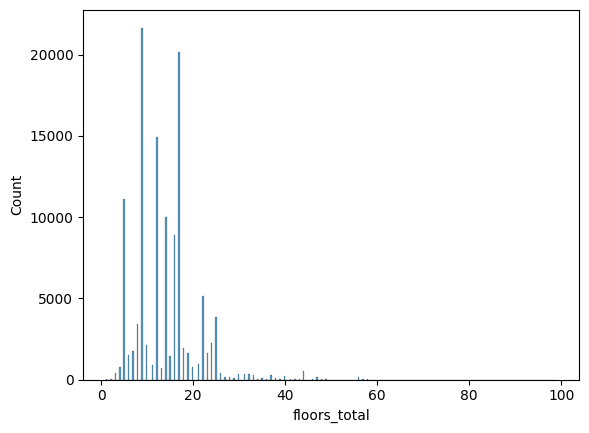

In [46]:
display(sns.histplot(transformed_data['floors_total']))
display(transformed_data['floors_total'].describe())

<Axes: xlabel='has_elevator', ylabel='Count'>

has_elevator
1    109473
0     12601
Name: count, dtype: int64

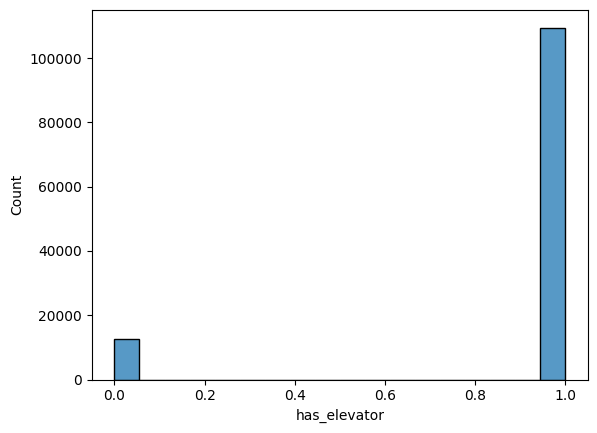

In [16]:
display(sns.histplot(transformed_data['has_elevator']))
transformed_data['has_elevator'].value_counts()

In [17]:
display(transformed_data['kitchen_area'].describe())

count    122074.000000
mean          8.954203
std           5.197637
min           0.000000
25%           6.100000
50%           8.700000
75%          10.200000
max         203.000000
Name: kitchen_area, dtype: float64

In [18]:
display(transformed_data['living_area'].describe())

count    122074.000000
mean         31.029512
std          23.500089
min           0.000000
25%          19.000000
50%          29.600000
75%          41.200001
max         700.000000
Name: living_area, dtype: float64

In [19]:
print(transformed_data['rooms'].value_counts())
print(transformed_data['rooms'].describe())

rooms
2     45880
1     36120
3     31924
4      5969
5      1469
6       477
7       145
8        48
9        18
10       17
12        4
20        1
17        1
16        1
Name: count, dtype: int64
count    122074.000000
mean          2.126309
std           0.988550
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: rooms, dtype: float64


In [20]:
transformed_data['is_apartment'].value_counts()

is_apartment
0    120899
1      1175
Name: count, dtype: int64

In [21]:
transformed_data['studio'].value_counts()

studio
0    122074
Name: count, dtype: int64

In [22]:
transformed_data['total_area'].describe()

count    122074.000000
mean         61.947111
std          39.466151
min          11.000000
25%          39.299999
50%          53.000000
75%          71.550003
max         920.000000
Name: total_area, dtype: float64

In [23]:
transformed_data['price'].describe()

count    1.220740e+05
mean     1.933651e+07
std      6.938117e+07
min      1.100000e+01
25%      8.950000e+06
50%      1.187000e+07
75%      1.680000e+07
max      9.873738e+09
Name: price, dtype: float64

In [24]:
transformed_data['latitude'].describe()

count    122074.000000
mean         55.730542
std           0.103139
min          55.211460
25%          55.653996
50%          55.724899
75%          55.808418
max          56.011032
Name: latitude, dtype: float64

In [25]:
transformed_data['longitude'].describe()

count    122074.000000
mean         37.588992
std           0.150716
min          36.864372
25%          37.491585
50%          37.581226
75%          37.691341
max          37.946411
Name: longitude, dtype: float64

<Axes: xlabel='latitude', ylabel='Count'>

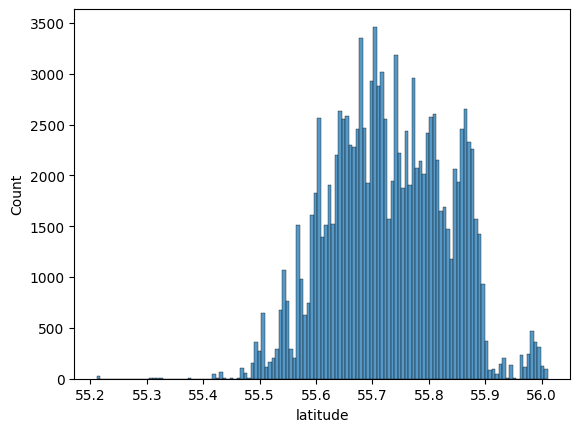

In [26]:
display(sns.histplot(transformed_data['latitude'])) 

<Axes: xlabel='longitude', ylabel='Count'>

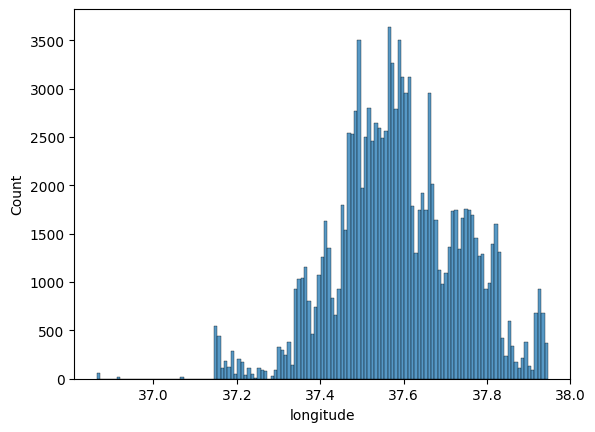

In [27]:
display(sns.histplot(transformed_data['longitude'])) 

In [35]:
def fill_missing_values(data):
    cols_with_nans = data.isnull().sum()
    if cols_with_nans.sum() > 0:
        cols_with_nans = cols_with_nans[cols_with_nans > 0].index
        for col in cols_with_nans:
            if data[col].dtype in [float, int]:
                fill_value = data[col].median()
            elif data[col].dtype == 'object':
                fill_value = data[col].mode().iloc[0]
            data[col] = data[col].fillna(fill_value)
    return data

filled_data = fill_missing_values(transformed_data)
filled_data.shape

(122074, 17)

In [60]:
def remove_outliers(data):
    cat_cols = data.loc[:, data.nunique() < 10].columns
    num_cols = data.select_dtypes(['float', 'int']).columns.drop(cat_cols)
    threshold = 1.5
    potential_outliers = pd.DataFrame()

    for col in num_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        margin = threshold * IQR
        lower = Q1 - margin
        upper = Q3 + margin
        potential_outliers[col] = ~data[col].between(lower, upper)

    outliers = potential_outliers.any(axis=1)
    data = data[~outliers].reset_index(drop=True)
    return data

without_outliers = remove_outliers(filled_data)
without_outliers.shape

(95560, 17)

In [39]:
Q1 = filled_data['ceiling_height'].quantile(0.25)
Q3 = filled_data['ceiling_height'].quantile(0.75)
print(Q1, Q3)

2.640000104904175 2.799999952316284


In [40]:
potential_outliers = pd.DataFrame()
IQR = Q3 - Q1
margin = 1.5 * IQR
lower = Q1 - margin
upper = Q3 + margin
potential_outliers['ceiling_height'] = ~filled_data['ceiling_height'].between(lower, upper)
outliers = potential_outliers.any(axis=1)
print(outliers.sum())

8283


In [45]:
filled_data[~outliers]

,flat_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,studio,total_area,price
0,0.0,1965,6,55.717113,37.781120,2.64,84,12,1,9,9.90,19.900000,1,0,0,35.099998,9500000
1,1.0,2001,2,55.794849,37.608013,3.00,97,10,1,7,0.00,16.600000,1,0,0,43.000000,13500000
2,2.0,2000,4,55.740040,37.761742,2.70,80,10,1,9,9.00,32.000000,2,0,0,56.000000,13500000
3,3.0,2002,4,55.672016,37.570877,2.64,771,17,1,1,10.10,43.099998,3,0,0,76.000000,20000000
4,4.0,1971,1,55.808807,37.707306,2.60,208,9,1,3,3.00,14.000000,1,0,0,24.000000,5200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122069,141357.0,2013,4,55.626579,37.313503,2.64,672,25,1,16,11.00,18.000000,1,0,0,42.000000,10500000
122070,141358.0,1960,1,55.727470,37.768677,2.48,80,5,0,5,5.28,28.330000,2,0,0,41.110001,7400000
122071,141359.0,1966,4,55.704315,37.506584,2.64,72,9,1,7,5.30,20.000000,1,0,0,31.500000,9700000
122072,141360.0,2017,4,55.699863,37.939564,2.70,480,25,1,15,13.80,33.700001,2,0,0,65.300003,11750000


In [53]:
cat_cols = filled_data.loc[:, filled_data.nunique() < 10].columns
cat_cols

Index(['building_type_int', 'has_elevator', 'is_apartment', 'studio'], dtype='object')

In [58]:
num_cols = filled_data.select_dtypes(['float', 'int']).columns.drop(cat_cols)

In [59]:
num_cols

Index(['build_year', 'latitude', 'longitude', 'ceiling_height', 'flats_count',
       'floors_total', 'floor', 'kitchen_area', 'living_area', 'rooms',
       'total_area', 'price'],
      dtype='object')